
# Project Two: Missed Appointements 
### By Leigh Crupi

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
The data set used in this project is from Kaggle. It contains data from 110,527 medical appointments and has 14 variables for each. The data was collected in Brazil by Joni Hoppen. This data set also includes information on if the patient actually attended the appointmet or not. This could provide valuable insight regarding correlations between the other variables and appointment attendance. This report with specifically investegate two questions:
1. Is there a correlation between SMS appointment reminders and attendance?
2. Is there a correlation between age group and appointment attendance?


In [2]:
#Importing necessary packages
import pandas as pd 
import matplotlib.pyplot as plt 
% matplotlib inline 
import seaborn as sns 

UsageError: Line magic function `%` not found.


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [3]:
# Read in data 
df = pd.read_csv('appointment_data.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Check data cleanliness 


In [4]:
# Establish dataframe shape 
df.shape

(110527, 14)

In [5]:
# Display Summary of dataframe information including number of null values and data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


** *There are no null values in this data set 

In [6]:
# Check for duplicated data 
sum(df.duplicated())

0

** * There is no duplicated rows in this data set 


### Data Cleaning 
This dataframe has 14 columns and 110527 rows. The data is already very clean. It contains no null vales or duplicated data.That being said, the following changes should be made to make the data more useable and clear:
* Column titles should be made lowercase with underscores 
* No show column should be clarified 
* scheduled_day and appointment_day should be simplified and the data type changed 
* Patient id column can be deleted since we are only concerned with appointment attencence 


In [7]:
# Change column titles to be all lowercase
df.columns = [x.lower() for x in df.columns]

# Check change 
df.head(0)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show


In [8]:
# Add underscores to column titles that require it and fix any spelling errors 
df.rename(columns={"patientid": "patient_id", "appointmentid":"appointment_id", "scheduledday": "scheduled_day","appointmentday":"appointment_day","hipertension":"hypertension","handcap":"handicap"}, inplace = True)
# Check changes 
df.head(0)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no-show


In [9]:
# Clarify no-show column
# Change column name from no-show to attended 
df.rename(columns={"no-show":"attended"}, inplace = True)
# Check changes 
df.head(0)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,attended


In [10]:
# Change Yes values to 0 
df['attended'] = df['attended'].replace(to_replace = "Yes", value = 0)
# Check changes 
df.head(10)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,attended
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598510e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336880e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,0
7,3.449830e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,0
8,5.639470e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812460e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [11]:
# Change no values in columns to 1
df['attended'] = df['attended'].replace(to_replace = "No", value = 1)
# Check change 
df.head(10)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,attended
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,1
5,9.598510e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,1
6,7.336880e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,0
7,3.449830e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,0
8,5.639470e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,1
9,7.812460e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,1


In [12]:
# Change attendance column data type from an object to an int 
df['attended']=df['attended'].astype(int)
# Check change 
df['attended'].dtypes

dtype('int32')

In [13]:
# Eleminate schedule_day time 
df['scheduled_day'] = df['scheduled_day'].str[:-10]
#check changes 
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,attended
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,5.589980e+14,5642503,M,2016-04-29,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4.262960e+12,5642549,F,2016-04-29,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,8.679510e+11,5642828,F,2016-04-29,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8.841190e+12,5642494,F,2016-04-29,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,1


In [14]:
# Eleminate empty appointment_day time 
df['appointment_day'] = df['appointment_day'].str[:-10]
#check changes 
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,attended
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,5.589980e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4.262960e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,8.679510e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8.841190e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1


In [15]:
# Change data types of scheduled_day and appointment_day to datetime64
df['scheduled_day']=pd.to_datetime(df['scheduled_day'])
df['appointment_day']=pd.to_datetime(df['appointment_day'])
# Check Change 
df.dtypes

patient_id                float64
appointment_id              int64
gender                     object
scheduled_day      datetime64[ns]
appointment_day    datetime64[ns]
age                         int64
neighbourhood              object
scholarship                 int64
hypertension                int64
diabetes                    int64
alcoholism                  int64
handicap                    int64
sms_received                int64
attended                    int32
dtype: object

In [16]:
# Drop the patient id column
df.drop(columns=['patient_id'],inplace = True)
#Check the change 
df.head(1)

,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,attended
0,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1


In [17]:
df['scheduled_day']=pd.to_datetime(df['scheduled_day'])
df.dtypes

appointment_id              int64
gender                     object
scheduled_day      datetime64[ns]
appointment_day    datetime64[ns]
age                         int64
neighbourhood              object
scholarship                 int64
hypertension                int64
diabetes                    int64
alcoholism                  int64
handicap                    int64
sms_received                int64
attended                    int32
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis

### General data exploration 

#### Patient Gender at Appointment 

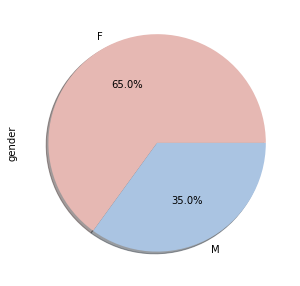

In [18]:
# Make a visualization of patient gender 
gcolors = ["#e6b8b3","#aac4e2" ]
df['gender'].value_counts().plot(kind ='pie', autopct='%1.1f%%', shadow= True, colors=gcolors, figsize= (5,5))


> Most appointments, 65%, are for women. Meanwhile, men only account for 35% of all appointments 

#### Patient Bolsa Enrollment 

Text(0, 0.5, 'Number of Appointments')

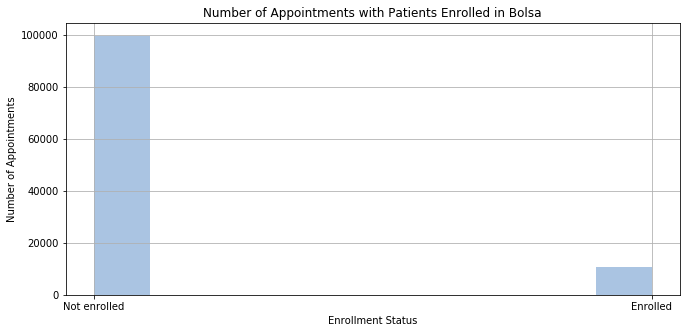

In [19]:
df['scholarship'].hist(figsize=(11,5),color="#aac4e2")
plt.title('Number of Appointments with Patients Enrolled in Bolsa')
plt.xlabel('Enrollment Status')
plt.xticks([0,1],['Not enrolled', 'Enrolled'] )
plt.ylabel('Number of Appointments')

> The vast majority of appointments do not involve a patient enrolled in Bolsa health care benefits 

#### Pre-Existing Conditions

Text(0.5, 1.0, 'Appointments with Patients Who Have Pre-Existing Conditions')

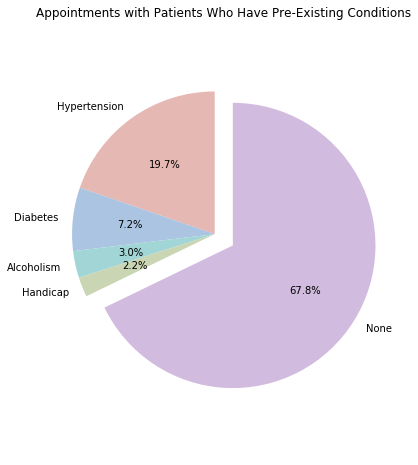

In [20]:
#Find total number of appointments with each pre-existing condition
ht = df['hypertension'].sum()
dia = df['diabetes'].sum()
alc = df['alcoholism'].sum()
hc = df['handicap'].sum()
# Find number of appointments involving patients that dont have a pre-existing condition 
healthy = (110527 - (ht+ dia+alc+hc))
#Pick colors for pie chart 
ccolors = ["#e6b8b3","#aac4e2","#a2d5d6","#cad5b3" , "#d1bbdf"]

#Make data frame with numbers of patients with conditions 
existing_conditions= pd.DataFrame({' ': [ht,dia,alc,hc,healthy]}, index= ['Hypertension', 'Diabetes', 'Alcoholism','Handicap','None'])
#Plot data frame as pie chart 
existing_conditions.plot(kind ='pie',fontsize=10, legend= False, autopct='%1.1f%%', shadow= False, figsize= (6,8), subplots=True, startangle=90, colors=ccolors, explode=(0, 0, 0, 0, 0.15))
plt.axis('equal')
plt.title('Appointments with Patients Who Have Pre-Existing Conditions')


> Most appointments involve a patient with no listed pre-existing condition
#### Appointment Attendance 

Text(0, 0.5, 'Number of Appointments')

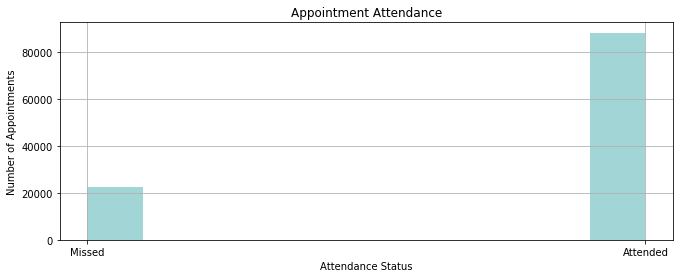

In [21]:
#Make a chart showing the attened column
df['attended'].hist(figsize=(11,4),color= "#a2d5d6", )
#Title Chart
plt.title('Appointment Attendance')
#Label x-axis
plt.xlabel('Attendance Status')
#Format 0, 1 values to missed and attened on x-axis 
plt.xticks([0,1],['Missed', 'Attended'])
#Label y-axis
plt.ylabel('Number of Appointments')

> More than 20,000 appointments in the data set were missed 

## Is there a correlation between recieving an appointment reminder text and attendance?

Text(0, 0.5, 'Number of Appointments')

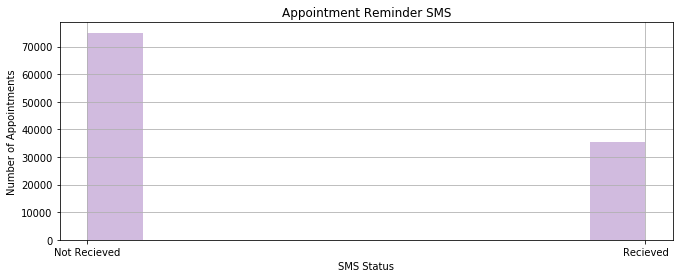

In [22]:
df['sms_received'].hist(figsize=(11,4),color= "#d1bbdf")
plt.title('Appointment Reminder SMS')
plt.xlabel('SMS Status')
plt.xticks([0,1],['Not Recieved', 'Recieved'])
plt.ylabel('Number of Appointments')


> A little bit less than half of all appointments have have an SMS reminder sent out before them 

(0.6, 0.9)

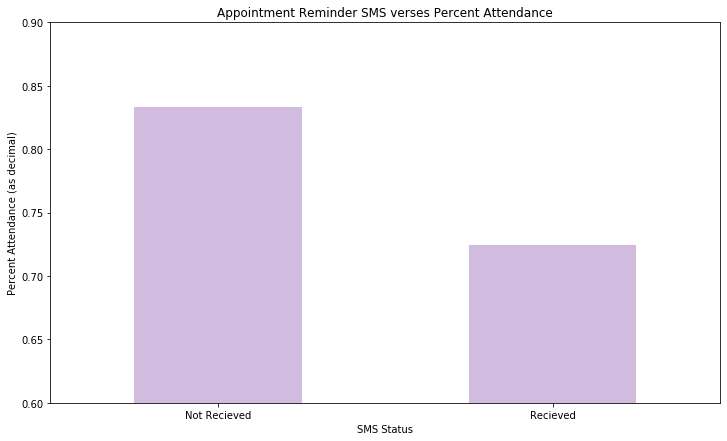

In [23]:
#Find the percent attendance of the two groups
sms_attendance = df.groupby('sms_received')['attended'].mean()
# Plot Percent attendances 
sms_attendance.plot(kind = 'bar', figsize =(12,7), color="#d1bbdf")
# Title Graph
plt.title('Appointment Reminder SMS verses Percent Attendance')
# Rename x-axis
plt.xlabel('SMS Status')
# Rename x-axis ticks 
plt.xticks([0,1],['Not Recieved', 'Recieved'])
#Make ticks horizontal
plt.xticks(rotation=0)
# Label y-axis 
plt.ylabel('Percent Attendance (as decimal)')
# Change graph limiters to make data clearer 
plt.ylim(.6,.9)


In [24]:
sms_attendance 

sms_received
0    0.832967
1    0.724255
Name: attended, dtype: float64

> Appointments that did not have an SMS reminder had an 83.3% attendance rate. Appointments that did have an SMS reminder had an 72.4% attendance rate 

## Is there a correlation between age group and appointment attendance?

Text(0, 0.5, 'Number of Appointments')

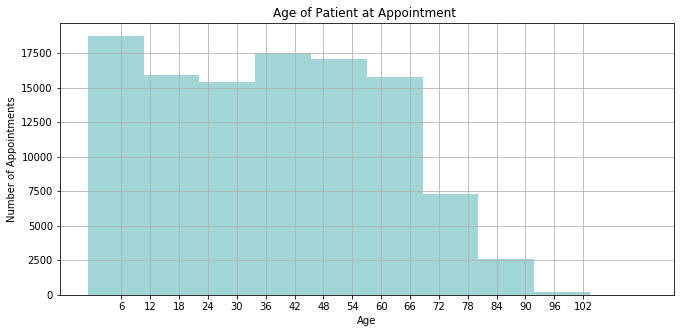

In [25]:
# Make a visual of patient age verses number of appointments 
df['age'].hist(figsize=(11,5),color= "#a2d5d6")
plt.title('Age of Patient at Appointment ')
plt.xlabel('Age')
plt.xticks([6,12,18,24,30,36,42,48,54,60,66,72,78,84,90,96,102])
plt.ylabel('Number of Appointments')

Below the data is cut into age groups at 6 year intervals in order to see which age groups tend to miss more appointments 

In [26]:
# Define the edges where the age groups begin and end 
bin_edges = [0,6,12,18,24,30,36,42,48,54,60,66,72,78,84,90,96,102]
#label the age groups 
bin_names = ['small child', 'child','adolecent','young adult','adult1','adult2','adult3','adult4','adult5','adult6','senior1','senior2','senior3','senior4','senior5','senior6','senior7']
#Add the age group in a new column 
df['age_group']=pd.cut(df['age'],bin_edges, labels = bin_names)
#Check the change 
df.head()

,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,attended,age_group
0,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,senior1
1,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,adult6
2,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1,senior1
3,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,child
4,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1,adult6


 #### The following chart defines the ages included in each age group:
 
|Age Group |Age in Years|
|:--- |:---- |
|Small child |0-6 |
|Child | 7-12|
|Adolecent | 13-18|
|Young adult | 19-24|
|Adult 1 | 25-30|
|Adult 2 | 31-36|
|Adult 3 | 37-42|
|Adult 4 | 43-48|
|Adult 5 | 49-54|
|Adult 6 | 55-60|
|Senior 1 | 61-66|
|Senior 2 | 67-72|
|Senior 3 | 73-78|
|Senior 4 | 79-84|
|Senior 5 | 85-90|
|Senior 6 | 91-96|
|Senior 7 | 97-102|

(0.7, 0.9)

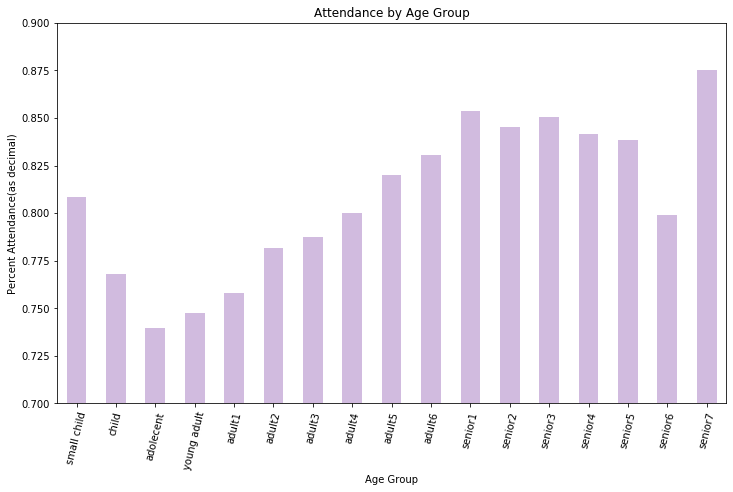

In [27]:
#Find the percent attendance of each age group
percent_attendance = df.groupby('age_group')['attended'].mean()
#Plot as Bar graph
percent_attendance.plot(kind = 'bar', figsize =(12,7), color="#d1bbdf")
#Title bar grap
plt.title('Attendance by Age Group')
#Title axes and make them easier to read 
plt.xlabel('Age Group')
plt.xticks(rotation=76)
plt.ylabel("Percent Attendance(as decimal)")
# Adjust chart limiters so it better shows trend in attendance 
plt.ylim(.7,.9)

In [28]:
percent_attendance

age_group
small child    0.808298
child          0.767986
adolecent      0.739464
young adult    0.747768
adult1         0.758011
adult2         0.781725
adult3         0.787681
adult4         0.799930
adult5         0.820064
adult6         0.830479
senior1        0.853687
senior2        0.845187
senior3        0.850427
senior4        0.841674
senior5        0.838509
senior6        0.799283
senior7        0.875000
Name: attended, dtype: float64

<a id='conclusions'></a>
## Conclusions

#### SMS Appointment Reminders
The data set does not show a correlation between sms appointment reminders and attendance. As shown above, Appointments that did not have an SMS reminder had an 83.3% attendance rate while appointments that did have an SMS reminder had an 72.4% attendance rate. This, of course, does not show causation: text reminders *do not* cause people to miss their appointments. It does, however show that they may not play much of a role in helping patients attend their appointments. 

#### Age Groups and Attendance 
The data set shows that adolecents thirteen to eightteen years old have the lowest attendance rate at 73.9% attendance followed by young adults, individuals between nineteen and twenty-four years old, at 74.8%. Percent attendance is higher for small children, at 80.8% and 76.8% respectively. After the young adult age group percent attendance somewhat consistantly increases until it drops in the senior 6 age group; this group is seniors ninety-one to ninety-six years old. The highest percent attendance is in the senior 7 group, seniors between ninety-seven and one hundred and two. 

In [30]:
# Save data Frame to CSV
df.to_csv('attendance_project_data.csv', index = False)